# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
treatment_results = pd.merge(study_results, mouse_metadata, on=["Mouse ID", "Mouse ID"], how="left")
# treatment_results["Tumor Volume (mm3)"] = treatment_results["Tumor Volume (mm3)"].round()

# Display the data table for preview
treatment_results.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = len(mouse_metadata["Mouse ID"].unique())
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = treatment_results[["Mouse ID", "Timepoint"]].duplicated()
duplicate_info = treatment_results[duplicate_mice]["Mouse ID"].unique()
duplicate_info

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = treatment_results.loc[treatment_results["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# mouse_data.loc[mouse_data["Mouse ID"] == "g989"]

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = treatment_results.loc[treatment_results["Mouse ID"] != "g989"]
mouse_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame
unique_mouse_count = len(mouse_data["Mouse ID"].unique())
unique_mouse_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = np.mean(study_results["Tumor Volume (mm3)"])
median_tumor_volume = np.median(study_results["Tumor Volume (mm3)"])
tumor_volume_variance = np.var(study_results["Tumor Volume (mm3)"],ddof = 0)
tumor_volume_std = np.std(study_results["Tumor Volume (mm3)"],ddof = 0)
tumor_volume_sem = sem(study_results["Tumor Volume (mm3)"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median = mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
variance = mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
std = mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem = mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"mean":mean,
                                  "median":median,
                                  "variance":variance,
                                  "std":std,
                                  "sem":sem})

summary_statistics

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
quick_summary_statistics = mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(
                        ['mean', 'median', 'var', 'std', 'sem'])
quick_summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
len(mouse_data["Drug Regimen"].unique())

10

## Bar and Pie Charts

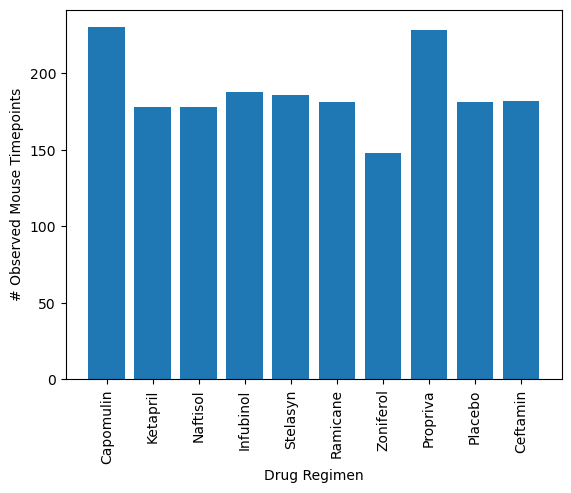

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
x_axis = np.arange(len(mouse_data["Drug Regimen"].unique()))
tick_locations = [value for value in x_axis]

drug_regimen = mouse_data["Drug Regimen"].unique()
total_rows_per_regimen = mouse_data.groupby('Drug Regimen')["Timepoint"].count()

plt.bar(drug_regimen, total_rows_per_regimen, align="center")
plt.xticks(tick_locations, mouse_data["Drug Regimen"].unique(), rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# Observed Mouse Timepoints")
plt.show()

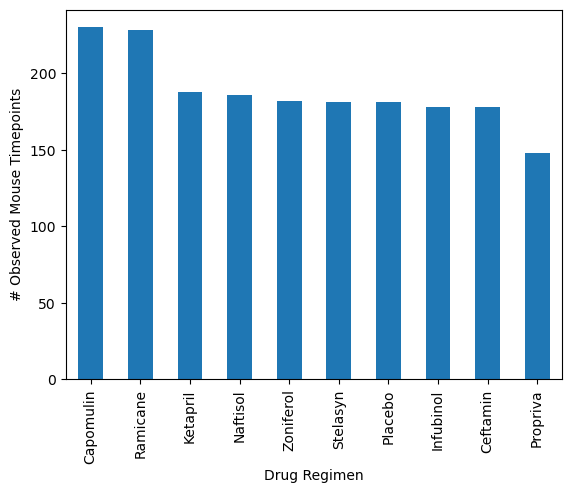

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = mouse_data["Drug Regimen"].value_counts()
regimen_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# Observed Mouse Timepoints")
plt.show()

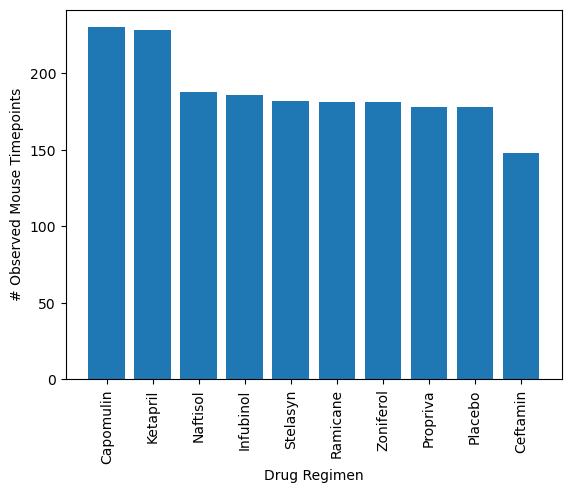

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_count.index, regimen_count.values, align="center")
plt.xticks(tick_locations, mouse_data["Drug Regimen"].unique(), rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# Observed Mouse Timepoints")
plt.show()

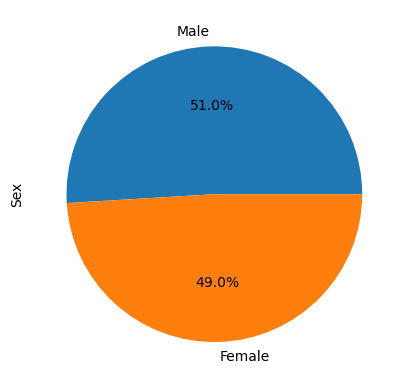

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = mouse_data["Sex"].value_counts()
gender_count.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

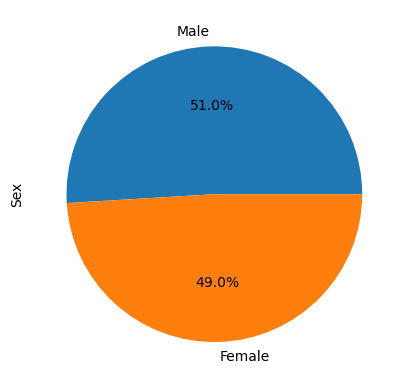

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count.values, labels=gender_count.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_data.groupby("Mouse ID")[["Timepoint"]].max().reset_index()
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(greatest_timepoint, mouse_data, how="left", on=["Mouse ID", "Timepoint"])
final_tumor_volumes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
special_drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in special_drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_data.loc[(tumor_data<lower_bound)|(tumor_data>upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


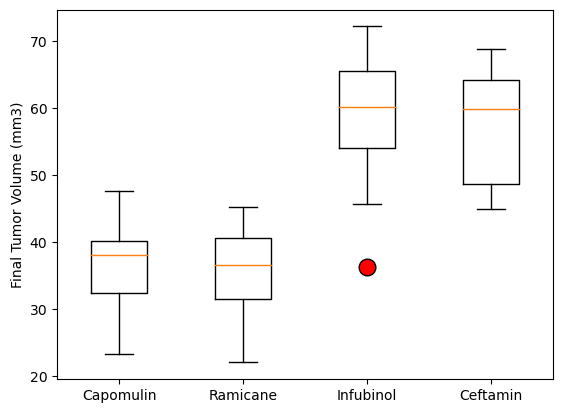

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=special_drug_list, 
            flierprops=dict(marker='o', markerfacecolor='red', markersize=12))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

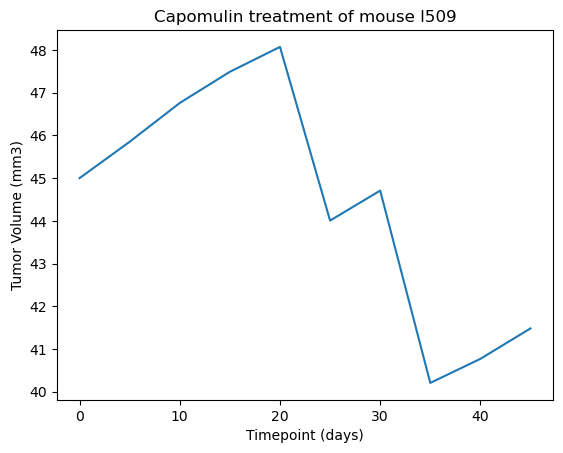

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
treated_mouse = mouse_data.loc[mouse_data["Mouse ID"] == "l509"]

plt.plot(treated_mouse['Timepoint'], treated_mouse['Tumor Volume (mm3)'])
    
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

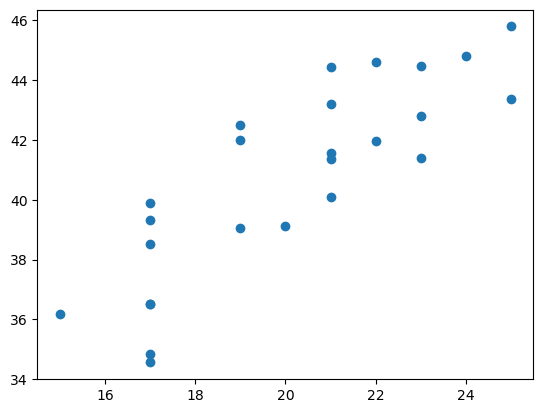

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
entire_drug_regimen = mouse_data[mouse_data["Drug Regimen"] == "Capomulin"]
average = entire_drug_regimen.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean()

plt.scatter(average['Weight (g)'], average['Tumor Volume (mm3)'])
plt.show()

## Correlation and Regression

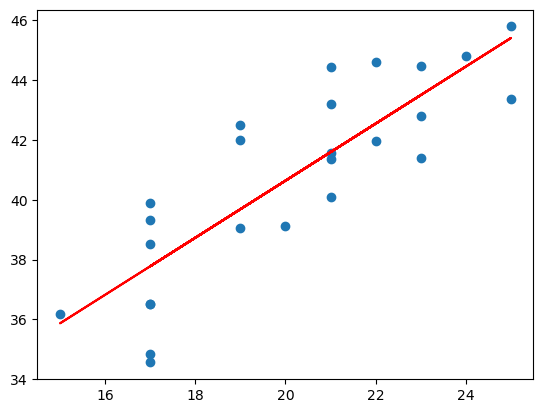

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
entire_drug_regimen = mouse_data[mouse_data["Drug Regimen"] == "Capomulin"]
average = entire_drug_regimen.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean()

x_values = average['Weight (g)']
y_values = average['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()